# Insurance Claims- Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

# Graphical Representation

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fraud Detection')

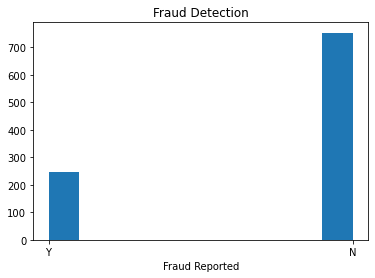

In [7]:
#Histogram plot for Fraud detection of given data.
plt.hist(df['fraud_reported'])
plt.xlabel('Fraud Reported')
plt.title('Fraud Detection')

from histogram plot the fraud reported of an insurance policy is 247 of 1000.

<AxesSubplot:title={'center':'Monthly Customer'}, xlabel='months_as_customer', ylabel='Density'>

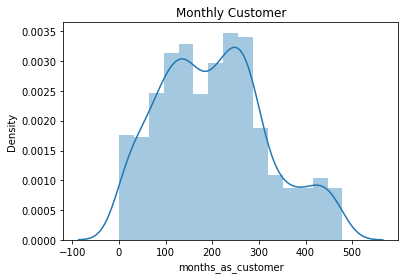

In [8]:
#Distplot for monthly charges for data
plt.title('Monthly Customer')
sns.distplot(df['months_as_customer'],kde=True)

from distplot clears that the monthly customer range is from 100 to 300.

<AxesSubplot:title={'center':'Age range of Customer'}, xlabel='age', ylabel='count'>

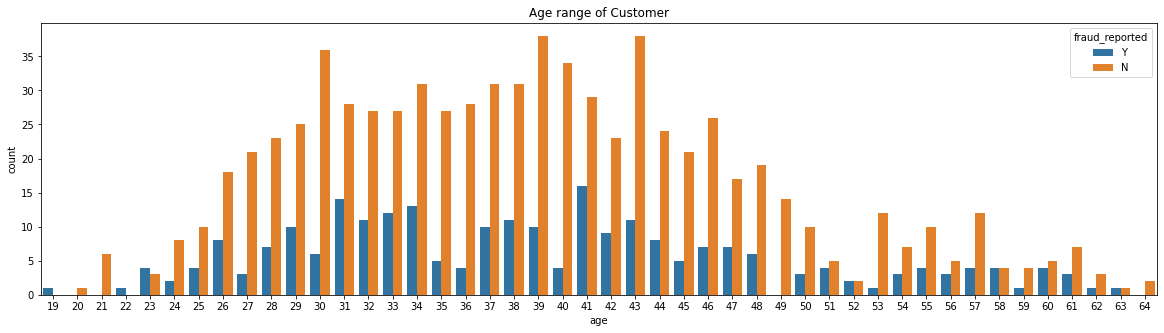

In [9]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(20,5))
plt.title('Age range of Customer')
sns.countplot(x='age',hue='fraud_reported',data=df)

from countplot clears that fraud reported is high & low at age range of 41 & 64 years.

<AxesSubplot:title={'center':'Policy numbers of customer'}, xlabel='policy_number', ylabel='Density'>

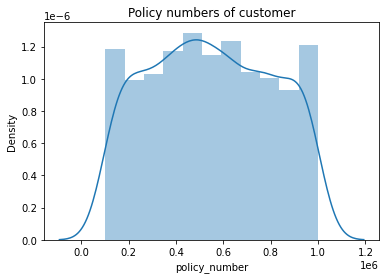

In [10]:
#Distplot for policy numbers of data
plt.title('Policy numbers of customer')
sns.distplot(df['policy_number'],kde=True)

from distplot the policy numbers of customers lies between 0.2 to 1.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_state'>

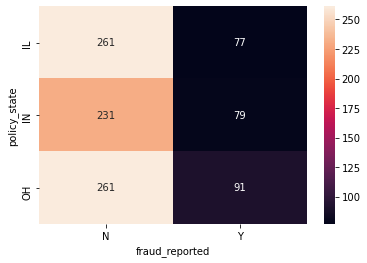

In [11]:
group=df.groupby(['policy_state','fraud_reported'])
policy_state_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(policy_state_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at policy state of OH, IN, & IL respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_csl'>

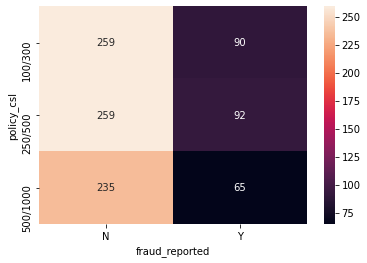

In [12]:
group=df.groupby(['policy_csl','fraud_reported'])
policy_csl_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(policy_csl_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at policy combined single limit of 250/500, 100/300, & 500/1000 respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

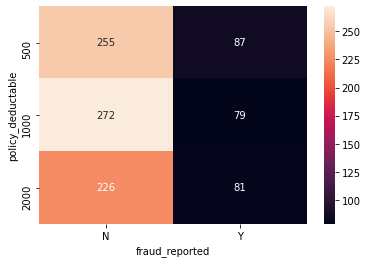

In [13]:
group=df.groupby(['policy_deductable','fraud_reported'])
policy_deductable_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(policy_deductable_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at policy combined deductable of 500, 2000, & 1000 respectively.

<AxesSubplot:title={'center':'Policy annual premium of customer'}, xlabel='policy_annual_premium', ylabel='Density'>

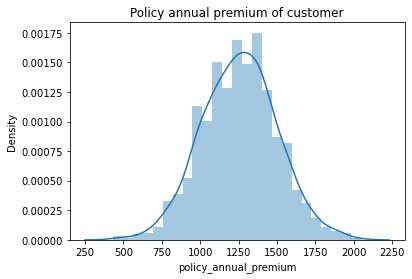

In [14]:
#Distplot for Policy annual premium of customer data
plt.title('Policy annual premium of customer')
sns.distplot(df['policy_annual_premium'],kde=True)

from distplot indicates that the policy annual premium  of customers lies between 500 to 20000.

<AxesSubplot:title={'center':'Umbrella Limit'}, xlabel='umbrella_limit', ylabel='count'>

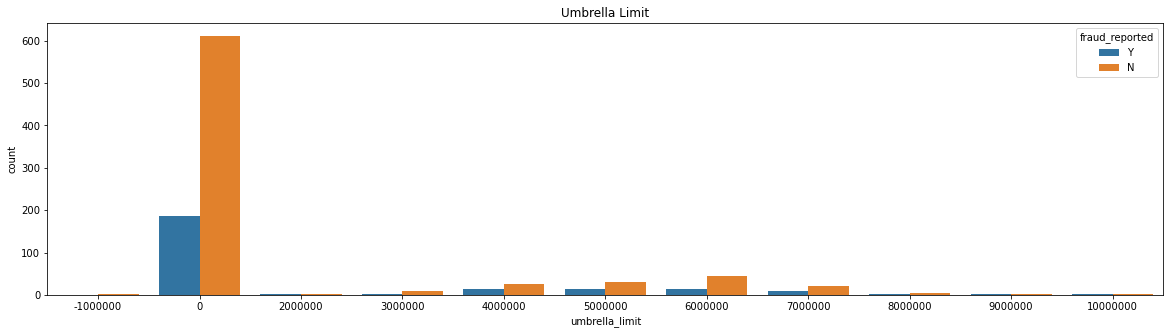

In [15]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(20,5))
plt.title('Umbrella Limit')
sns.countplot(x='umbrella_limit',hue='fraud_reported',data=df)

The countplot indictes that the umbrella insurance policy is providing some additional amount to customer who is insured under them.so maximum customer won't recieve this additional amount but some customer has importance to recieve this additional amount.

<AxesSubplot:title={'center':'Insured zip of customer'}, xlabel='insured_zip', ylabel='Density'>

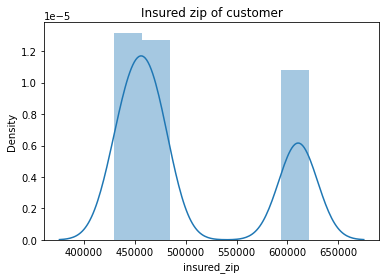

In [16]:
#Distplot for Insured zip of data
plt.title('Insured zip of customer')
sns.distplot(df['insured_zip'],kde=True)

from distplot indictes that the insured zip amount of customer lies between 40,000 to 50,000 & 60,000 to 65,000.

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_sex'>

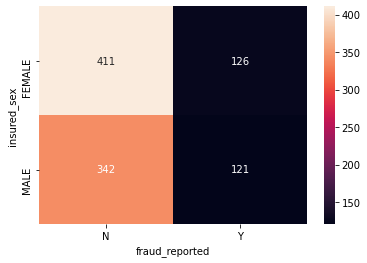

In [17]:
group=df.groupby(['insured_sex','fraud_reported'])
insured_sex_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(insured_sex_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high & low at gender of female & male.

<AxesSubplot:title={'center':'Insured Education Level'}, xlabel='insured_education_level', ylabel='count'>

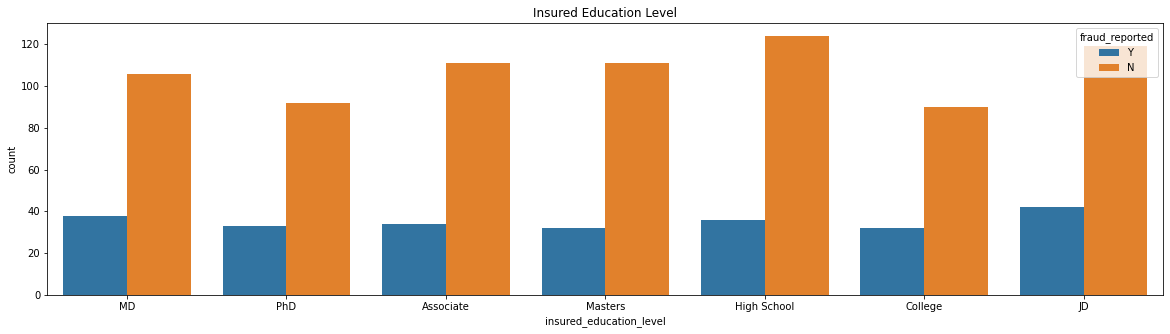

In [18]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(20,5))
plt.title('Insured Education Level')
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

The Countplot clears that according to their education level fraud report is generated.

<AxesSubplot:title={'center':'Insured Occupation Level'}, xlabel='insured_occupation', ylabel='count'>

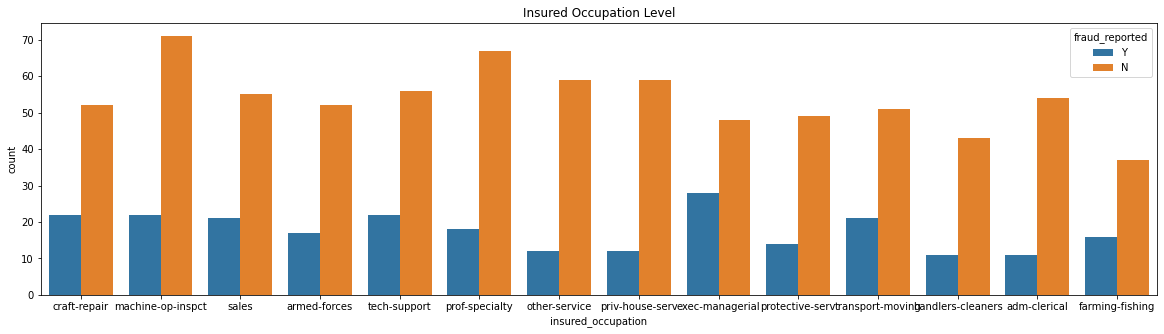

In [19]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(20,5))
plt.title('Insured Occupation Level')
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)

The Countplot clears that according to their occupation level  fraud report is generated.

<AxesSubplot:title={'center':'Insured Hobbies'}, xlabel='insured_hobbies', ylabel='count'>

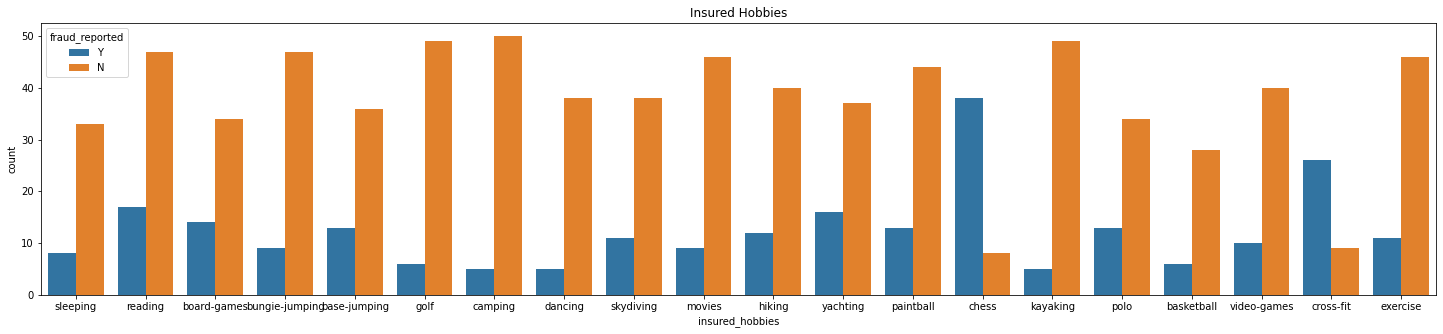

In [20]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(25,5))
plt.title('Insured Hobbies')
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

The Countplot clears that according to their hobbies fraud report is generated.

<AxesSubplot:title={'center':'Insured Relationship'}, xlabel='insured_relationship', ylabel='count'>

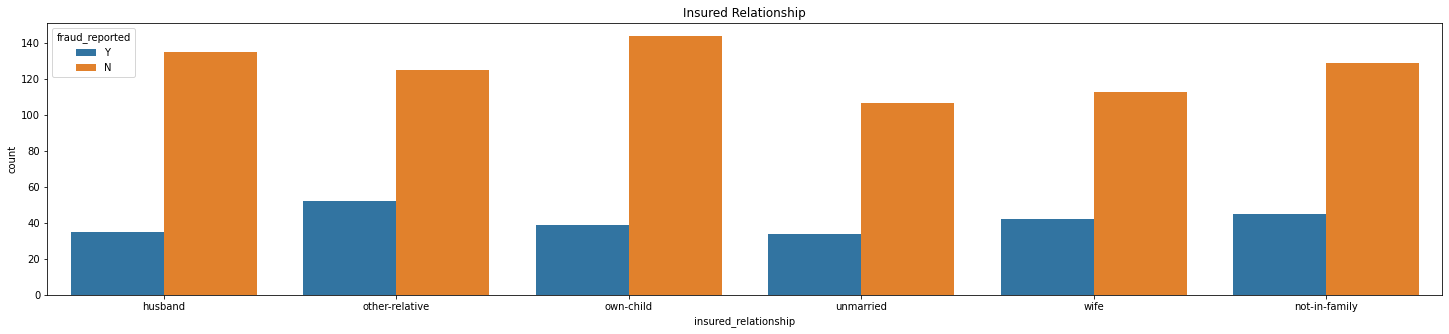

In [21]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(25,5))
plt.title('Insured Relationship')
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)

The Countplot clears that according to their relationship fraud report is generated.

<AxesSubplot:title={'center':'Capital gain of Customer'}, xlabel='capital-gains', ylabel='Density'>

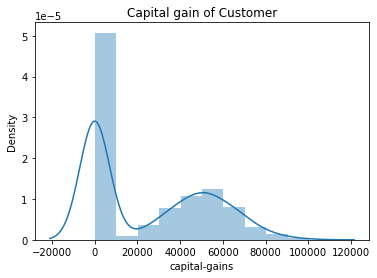

In [22]:
#Distplot for Captial gain of data
plt.title('Capital gain of Customer')
sns.distplot(df['capital-gains'],kde=True)

from distplot indicates that captial gain of customer is lies between 20,000 to 80,000.

<AxesSubplot:title={'center':'Capital loss of Customer'}, xlabel='capital-loss', ylabel='Density'>

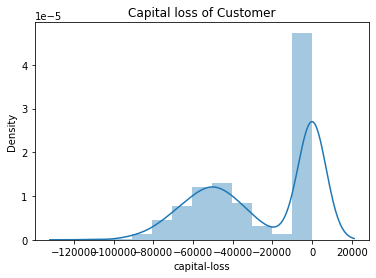

In [23]:
#Distplot for Capital loss of data
plt.title('Capital loss of Customer')
sns.distplot(df['capital-loss'],kde=True)

from distplot indicates that captial gain of customer is lies between -20,000 to -80,000.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_type'>

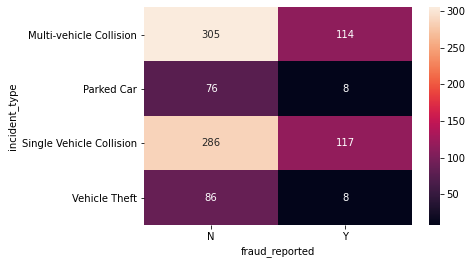

In [24]:
group=df.groupby(['incident_type','fraud_reported'])
incident_type_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(incident_type_fraud_reported, annot=True, fmt='d')

<AxesSubplot:xlabel='fraud_reported', ylabel='collision_type'>

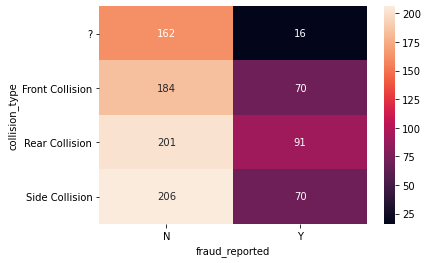

In [25]:
group=df.groupby(['collision_type','fraud_reported'])
collision_type_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(collision_type_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at collision type of rear, front/side and different parts respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_severity'>

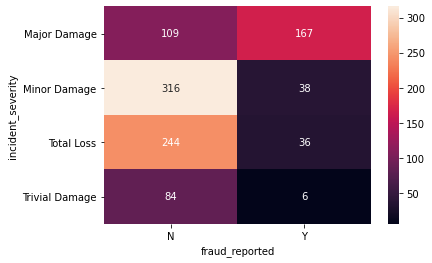

In [26]:
group=df.groupby(['incident_severity','fraud_reported'])
incident_severity_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(incident_severity_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at severe incident of major damge, minor damage/total loss and trival damage respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='authorities_contacted'>

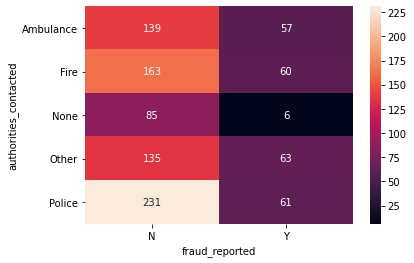

In [27]:
group=df.groupby(['authorities_contacted','fraud_reported'])
authorities_contacted_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(authorities_contacted_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at authorized contact of others/police/fire, amblance and none respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_state'>

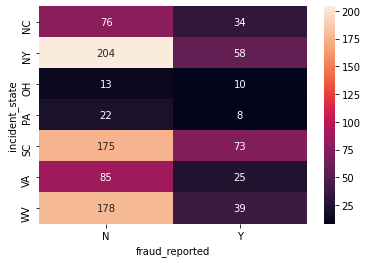

In [28]:
group=df.groupby(['incident_state','fraud_reported'])
incident_state_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(incident_state_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at incident state of SC, WV/NC, PA/OH respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_city'>

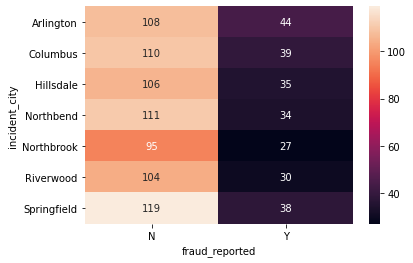

In [29]:
group=df.groupby(['incident_city','fraud_reported'])
incident_city_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(incident_city_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at incident state of Arlington, Northbend and Northbrook respectively.

<AxesSubplot:title={'center':'Hours calculated of incident'}, xlabel='incident_hour_of_the_day', ylabel='Density'>

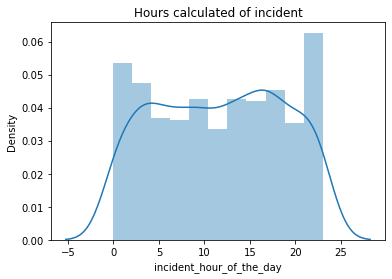

In [30]:
#Distplot for Hours calculated of incident of data
plt.title('Hours calculated of incident')
sns.distplot(df['incident_hour_of_the_day'],kde=True)

from distplot indicates that hours calucated of the day is lies between 1 to 22.

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

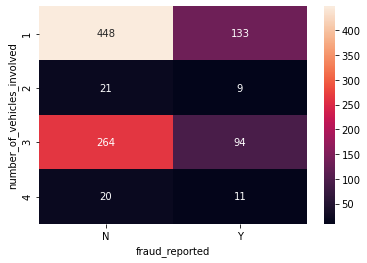

In [31]:
group=df.groupby(['number_of_vehicles_involved','fraud_reported'])
number_of_vehicles_involved_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(number_of_vehicles_involved_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high & low at number of vehicle involved in incident of 1/3 & 4/2 respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='property_damage'>

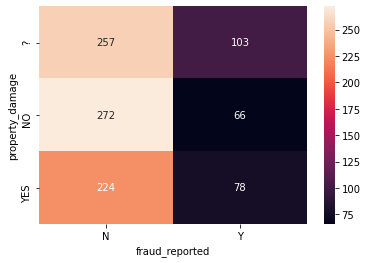

In [32]:
group=df.groupby(['property_damage','fraud_reported'])
property_damage_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(property_damage_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high for nothing is happend to the property.

<AxesSubplot:xlabel='fraud_reported', ylabel='bodily_injuries'>

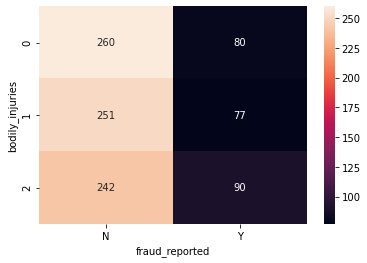

In [33]:
group=df.groupby(['bodily_injuries','fraud_reported'])
bodily_injuries_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(bodily_injuries_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at body injuries of 2, 0 and 1 respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

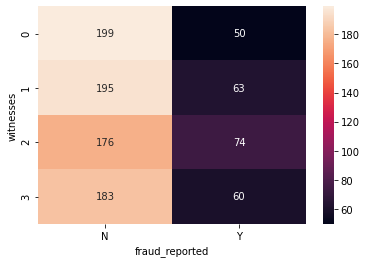

In [34]:
group=df.groupby(['witnesses','fraud_reported'])
witnesses_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(witnesses_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high, medium & low at Witness of 2, 1/3 and 0 respectively.

<AxesSubplot:xlabel='fraud_reported', ylabel='police_report_available'>

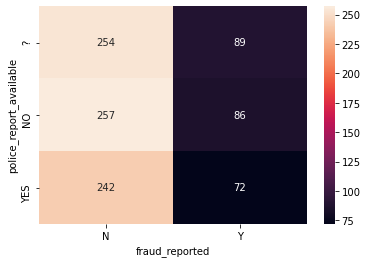

In [35]:
group=df.groupby(['police_report_available','fraud_reported'])
police_report_available_fraud_reported=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(police_report_available_fraud_reported, annot=True, fmt='d')

from heatmap clears that fraud reported is high at without an police report.

<AxesSubplot:title={'center':'Total amount claimed by customer'}, xlabel='total_claim_amount', ylabel='Density'>

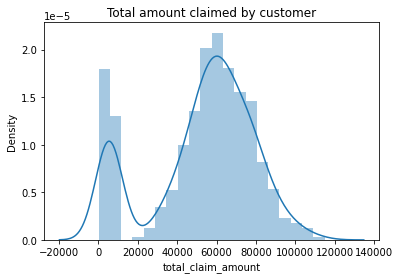

In [36]:
#Distplot for total claim amount of data
plt.title('Total amount claimed by customer')
sns.distplot(df['total_claim_amount'],kde=True)

from distplot clears that total claim amount distribution is lies between 20,000 to 1,20,000.

<AxesSubplot:title={'center':'Injury Claim'}, xlabel='injury_claim', ylabel='Density'>

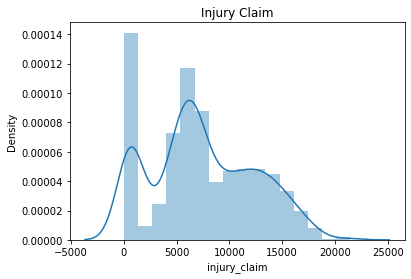

In [37]:
#Distplot for injury claim of data
plt.title('Injury Claim')
sns.distplot(df['injury_claim'],kde=True)

from distplot clears that injury claim distribution lies between 0 to 20,000.

<AxesSubplot:title={'center':'Property Claim'}, xlabel='property_claim', ylabel='Density'>

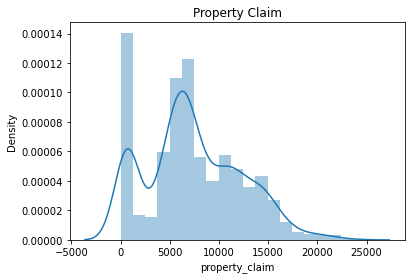

In [38]:
#Distplot for property claim of data
plt.title('Property Claim')
sns.distplot(df['property_claim'],kde=True)

from distplot indicates that property claim distribution lies between 0 to 25,000.

<AxesSubplot:title={'center':'Vehicle Claim'}, xlabel='vehicle_claim', ylabel='Density'>

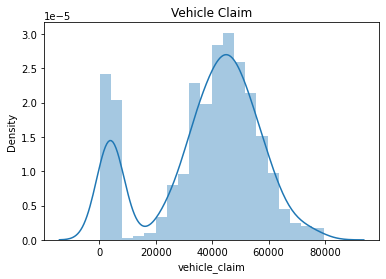

In [39]:
#Distplot for vehicle claim of data
plt.title('Vehicle Claim')
sns.distplot(df['vehicle_claim'],kde=True)

from distplot indicates that vehicle claim distribution lies between 0 to 80,000.

<AxesSubplot:title={'center':'Automobiles Manufactured Companies'}, xlabel='auto_make', ylabel='count'>

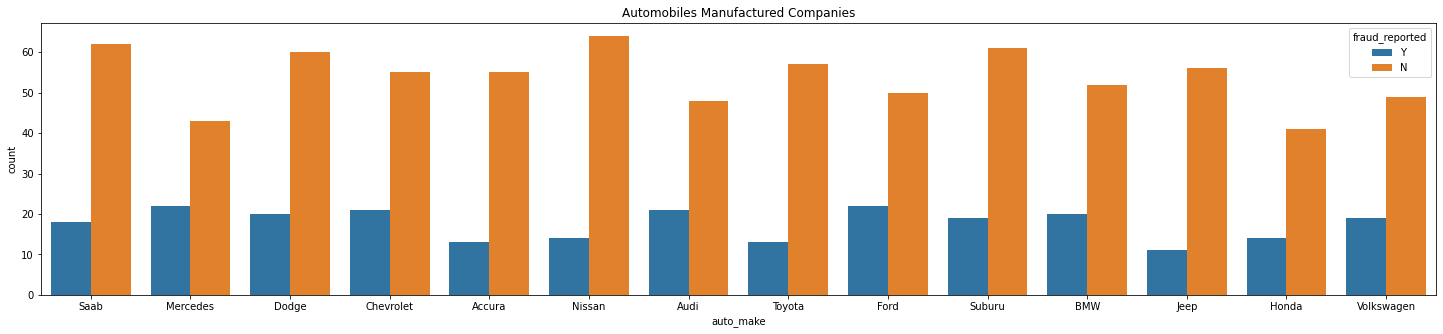

In [40]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(25,5))
plt.title('Automobiles Manufactured Companies')
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

The Countplot clears that according to their automobile manufactured companies fraud report is generated.

<AxesSubplot:title={'center':'Automobiles Model'}, xlabel='auto_model', ylabel='count'>

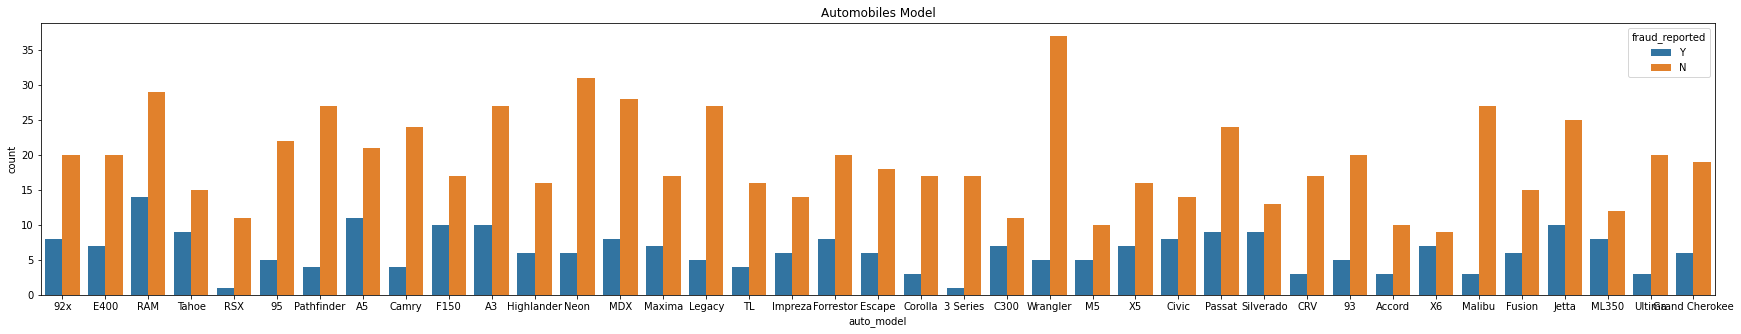

In [41]:
#Countplot Display distribution of data across all level of category
plt.subplots(figsize=(30,5))
plt.title('Automobiles Model')
sns.countplot(x='auto_model',hue='fraud_reported',data=df)

The Countplot clears that according to their automobile model fraud report is generated.

Graphical Represention Conclusion:

The columns that are going to be drop are policy bind date,incident date, incident location,insured education level,insured occupation,insured hobbies & c39.They are strings,cannot be categorized and don't contribute much to the outcome.

# Preprocessing

In [42]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [43]:
df.drop(['policy_bind_date','incident_date','incident_location','insured_education_level','insured_occupation','insured_hobbies','_c39'],axis=1,inplace=True)

In [44]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [45]:
df['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [46]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

In [47]:
df['policy_number'].unique()

array([521585, 342868, 687698, 227811, 367455, 104594, 413978, 429027,
       485665, 636550, 543610, 214618, 842643, 626808, 644081, 892874,
       558938, 275265, 921202, 143972, 183430, 431876, 285496, 115399,
       736882, 699044, 863236, 608513, 914088, 596785, 908616, 666333,
       336614, 584859, 990493, 129872, 200152, 933293, 485664, 982871,
       206213, 616337, 448961, 790442, 108844, 430029, 529112, 939631,
       866931, 582011, 691189, 537546, 394975, 729634, 282195, 420810,
       524836, 307195, 623648, 485372, 598554, 303987, 343161, 519312,
       132902, 332867, 356590, 346002, 500533, 348209, 486676, 260845,
       657045, 761189, 175177, 116700, 166264, 527945, 627540, 279422,
       484200, 645258, 694662, 960680, 498140, 498875, 798177, 614763,
       679370, 958857, 686816, 127754, 918629, 731450, 307447, 992145,
       900628, 235220, 740019, 246882, 797613, 193442, 389238, 760179,
       939905, 872814, 632627, 283414, 163161, 853360, 776860, 149367,
      

In [48]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [49]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [50]:
df['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

In [51]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [52]:
df['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

In [53]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [54]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [55]:
df['capital-gains'].unique()

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  53500,  45500,  57000,  46700,  72700,  31000,
        53200,  27500,  81100,  51400,  65700,  48500,  49700,  36400,
        35300,  88400,  47600,  71500,  36100,  56600,  94800,  36900,
        69100,  62400,  35700,  43400,  59600,  43300,  56200,  37800,
        78300,  52700,  57300,    800,  55200,  90700,  67700,  61500,
        37300,  50500,  34300,  28800,  52600,  34400,  62000,  41200,
        44300,  58000,  51100,  47200,  70500,  40700,  42400,  57900,
        60000,  65300,  84900,  45300,  68900,  46300,  76000,  58600,
        54100,  58100,  13100,  31900,  17600,  52000,  29000,  62500,
        39600,  47700,  38100,  71400,  75400,  88800,  53900,  27000,
        72200,  29600,  51000,  62700,  25000,  68500,  42900,  29300,
        45100,  63100,  66400,  25500,  59900,  62200,  24000,  24800,
        47800,  53000,  24400,  65600,  39900,  40600,  33300,  54000,
      

In [56]:
df['capital-loss'].unique()

array([      0,  -62400,  -46000,  -77000,  -39300,  -51000,  -32800,
        -55500,  -37800,  -27300,  -68200,  -31000,  -53500,  -29200,
        -30200,  -55600,  -64000,  -49200,  -55700,  -24100,  -67400,
        -60200,  -28700,  -40300,  -46500,  -39600,  -55000,  -45800,
        -58500,  -49500,  -49000,  -91200,  -66200,  -51500,  -50000,
        -50300,  -42900,  -19700,  -45000,  -40600,  -80600,  -44200,
        -78600,  -56100,  -20800,  -58400,  -71700,  -72300,  -31700,
        -58100,  -24300,  -56400,  -57000,  -47500,  -38800,  -41000,
        -56800,  -63100,  -36200,  -53700,  -69700,  -32100,  -47300,
        -54800,  -45200,  -65600,  -20400,  -77500,  -43200,  -56200,
        -57900,  -57100,  -38200,  -44600,  -44500,  -66900,  -82400,
        -54000,  -59100,  -59300,  -31400,  -26900,  -51100,  -59900,
        -88300,  -41300,  -45100,  -58900,  -22300,  -30300,  -51300,
        -57700,  -39200,  -67900,  -57500,  -90200,  -13800,  -34400,
        -36700,  -39

In [57]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [58]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [59]:
df['collision_type'].replace(['?'],['nan'],inplace=True)

In [60]:
df['collision_type'].unique()

array(['Side Collision', 'nan', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [61]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [62]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [63]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [64]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [65]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [66]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [67]:
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

In [68]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [69]:
df['property_damage'].replace(['?'],['nan'],inplace=True)

In [70]:
df['property_damage'].unique()

array(['YES', 'nan', 'NO'], dtype=object)

In [71]:
df['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

In [72]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

In [73]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [74]:
df['police_report_available'].replace(['?'],['nan'],inplace=True)

In [75]:
df['police_report_available'].unique()

array(['YES', 'nan', 'NO'], dtype=object)

In [76]:
df['total_claim_amount'].unique()

array([ 71610,   5070,  34650,  63400,   6500,  64100,  78650,  51590,
        27700,  42300,  87010, 114920,  56520,   7280,  46200,  63120,
        52110,  77880,  72930,  60400,  47160,  37840,  71520,  98160,
        71500,   9020,   5720,  69840,  91650,  75600,  67140,  29790,
        77110,  64800,  53100,  60200,   5330,  62300,  60170,  40000,
        97080,  51660,  51120,  56400,  55120,  62800,   7290,  76600,
        81800,   7260,   4300,  70510,   2640,  78900,  56430,   2400,
        65790,  62920,  69480,  44280,  56300,  68520,  59130,  82320,
        89700,  33930,  68530,  68310,  61290,  30100,  57120,  42930,
        51210,  89400,  59730,   8060,  72200,  50800,   6600,   7500,
         6490,  60940,  58300,  68400,  64240,   4700,  45120,  66950,
        98340,   5900,  70680,  93720,   6930,  64890,   5400,   5600,
        79300,  52800,  28800,   2970,  93480,   4320,  79800,  74200,
        70590,  74700,  70000,  81070,  57720,   7080,  47700,  51260,
      

In [77]:
df['injury_claim'].unique()

array([ 6510,   780,  7700,  6340,  1300,  6410, 21450,  9380,  2770,
        4700,  7910, 17680,  4710,  1120,  4200, 10520,  5790, 14160,
        6630,  6040,     0, 17880,  8180,  7080, 16500,  1640,  1040,
        7760, 14100, 12600,  7460,  3310, 14020, 10800, 10620,  6020,
        1230, 12460, 10940,  8000, 16180,  5740,  5680, 11280,  6890,
        6280,   810, 15320, 16360,  1320,   430, 12820,   480, 15780,
         300,  7310, 11440, 15440,  7380,  5630, 11420,  6570, 13720,
       13800,   860, 12420,  6810,  3010,  9520,  9540, 11380, 14900,
       10860,  1240, 14440, 10160,   660,   750,  1180,  5540,  5830,
       11400, 11680,   940, 10300,  8940,   590,  5890, 17040,  1260,
        7210,   900,   700, 15860, 10560,   330, 15580,  6650,  7420,
        7470, 14000, 14740, 14430,  4770,  9320,  6400, 18000, 13240,
       13860, 12760,  8570,  7000,  3300,  5760, 10640,  4970, 14120,
        6150,  8500,  4680, 17360, 13840,   410,  6550, 12260,  9460,
         470,  1890,

In [78]:
df['vehicle_claim'].unique()

array([52080,  3510, 23100, 50720,  4550, 51280, 50050, 32830, 22160,
       32900, 63280, 79560, 42390,  5040, 33600, 42080, 40530, 56640,
       53040, 48320, 41920, 33110, 47680, 73620, 44000,  6560,  4160,
       46560, 63450, 50400, 52220, 23170, 49070, 48600, 37170, 48160,
        3280, 43610, 38290, 28000, 64720, 40180, 39760, 33840, 48230,
       63090, 50240,  5670, 53620, 57260,  5280,  3440, 44870,  1680,
       55230, 50160,  1800, 51170, 45760, 54040, 33210, 39410, 51390,
       45990, 61740, 62100, 30160, 49840,  2580, 49680, 47670, 27090,
       42840, 28620, 34140, 67050, 38010,  5580, 50540, 30480,  4620,
        5250,  4130, 44320, 40810, 45600, 40880,  3290, 39480, 46350,
       71520,  4720, 53010, 68160, 59670, 50470,  3600,  4200, 47580,
       36960, 25200,  2310, 70110,  3360, 53200, 51940, 48870, 52290,
       49000, 51590, 33670, 33390, 32620, 51200, 63000, 52960, 41580,
       51040, 49280, 51420, 28800,  2970, 42560, 34790, 56480, 43050,
       34000, 32760,

In [79]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [80]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [81]:
df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [82]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [83]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model

In [84]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount       

There are many object types is identiifed in columns features.So the data type should be converted into integer type using Label encoder preprocessing method.

In [85]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [86]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,2,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0


In [87]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount       

In [88]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,1.000000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.828666,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


<AxesSubplot:>

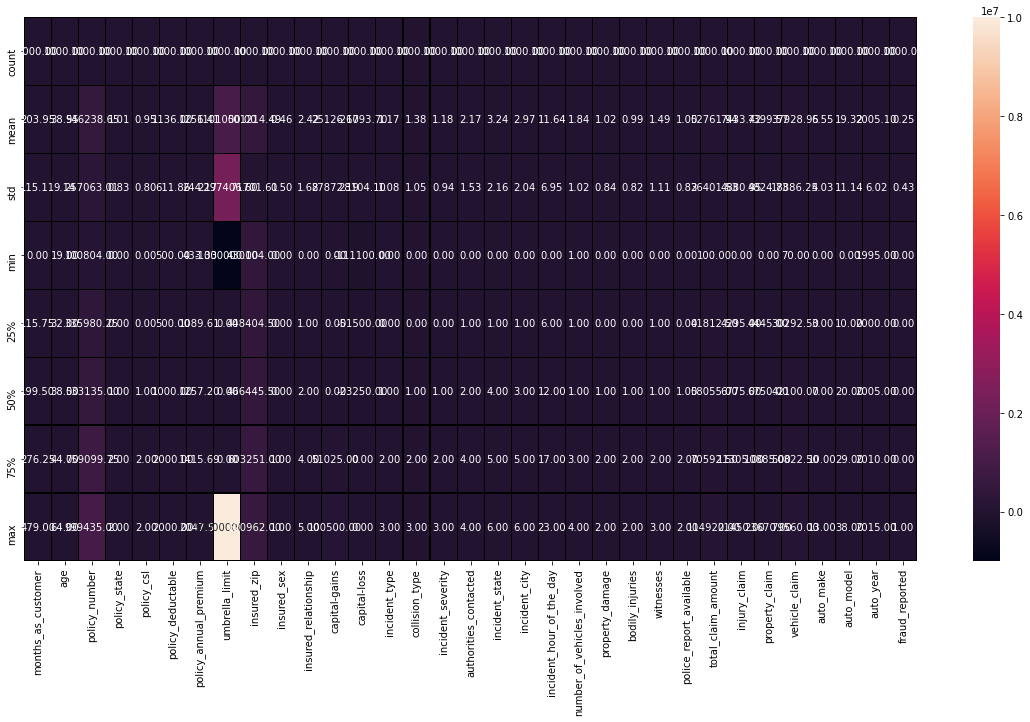

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [90]:
dfcor=df.corr()
dfcor

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.012661,-0.010198,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,-0.024713,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,-0.007507,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.004936,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,0.034177,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,0.050983,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,-0.029056,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


<AxesSubplot:>

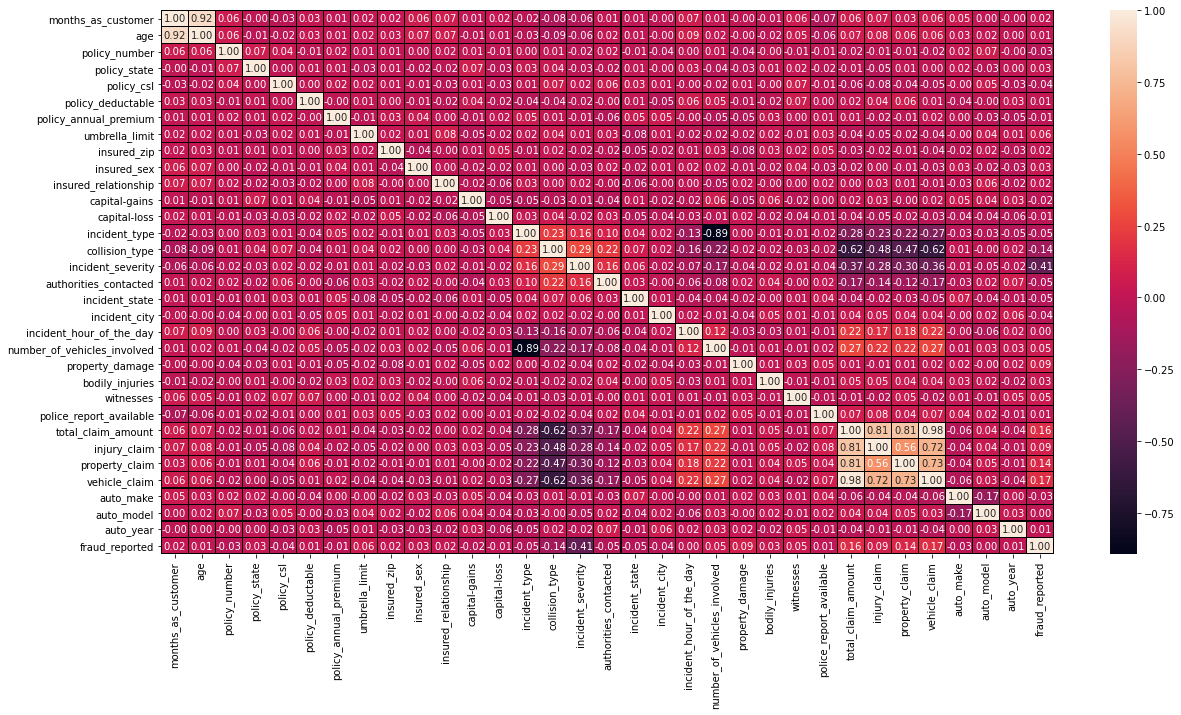

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

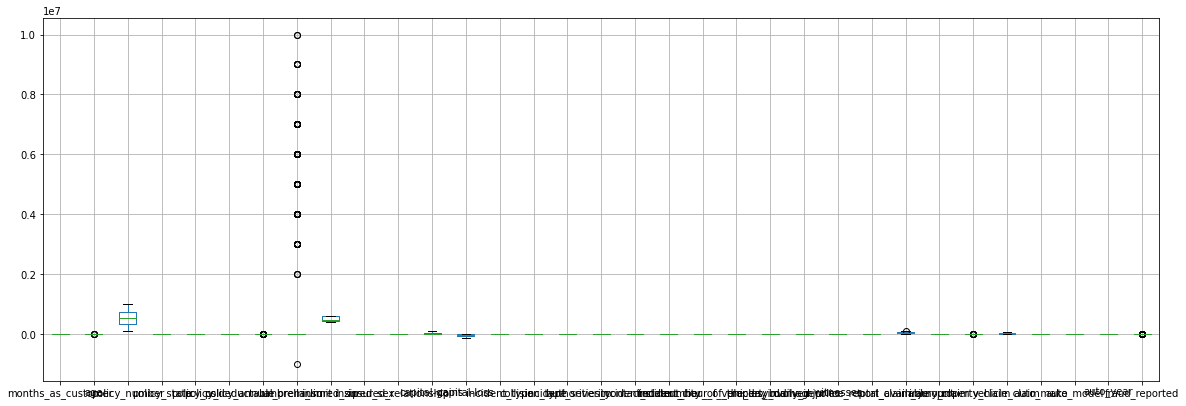

In [92]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [93]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 0.09595307, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 0.79152739, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 0.55056594, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.44891961, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 0.04786687, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.03830297, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [94]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,2,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0


In [95]:
df.shape

(1000, 33)

In [96]:
df_new.shape

(980, 33)

In [97]:
Data_loss=((1000-980)/1000*100)
Data_loss

2.0

# To ckeck distribution of Skewness.

In [98]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.000000


In [99]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [100]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.000000


To handle Skewness using Power transform function.

In [101]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [102]:
df_new.skew()

months_as_customer            -0.135661
age                           -0.001945
policy_number                 -0.160374
policy_state                  -0.145377
policy_csl                    -0.100769
policy_deductable              0.023988
policy_annual_premium          0.004758
umbrella_limit                -7.865930
insured_zip                    0.000000
insured_sex                    0.148630
insured_relationship          -0.160421
capital-gains                  0.038722
capital-loss                   0.090488
incident_type                 -0.088766
collision_type                -0.118845
incident_severity             -0.079282
authorities_contacted         -0.227269
incident_state                -0.255777
incident_city                 -0.181772
incident_hour_of_the_day      -0.256957
number_of_vehicles_involved    0.363693
property_damage               -0.151801
bodily_injuries               -0.128799
witnesses                     -0.153648
police_report_available       -0.133955


In [103]:
x=df_new
x.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.051279,1.008733,-0.023156,1.146048,0.178846,0.067784,0.616676,-0.349113,0.0,1.076953,...,0.108332,0.517616,0.098006,0.715714,0.005762,1.081793,0.753697,0.859111,-1.808345,-0.197455
1,0.304536,0.431433,-0.745292,0.071806,0.178846,1.271863,-0.242577,1.357817,0.0,1.076953,...,-1.254857,-1.410682,1.159846,-1.776979,-1.525347,-1.557391,-1.786629,0.418616,-0.586225,0.302622
2,-0.511226,-1.139513,0.587931,1.146048,-1.237596,1.271863,0.642206,1.357817,0.0,-0.928546,...,1.178068,1.290743,-1.249566,-0.716825,0.223833,-0.577507,-0.820881,-0.555149,0.944905,0.302622
3,0.523344,0.327852,-1.266438,-1.259374,0.178846,1.271863,0.652860,1.644005,0.0,-0.928546,...,0.108332,0.517616,-1.249566,0.391426,-0.026762,-0.034793,0.677602,-0.828189,1.252785,1.497810
4,0.304536,0.631918,-0.640684,-1.259374,1.230487,0.067784,1.342030,1.644005,0.0,1.076953,...,-1.254857,-0.355794,-1.249566,-1.729802,-1.304154,-1.622102,-1.740038,-1.809810,1.022679,0.640027


# Classification model

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is " ,maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8071428571428572  on Random_state  45


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state=45)

Logistic Regression model

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8071428571428572
[[504  33]
 [102  61]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       537
           1       0.65      0.37      0.47       163

    accuracy                           0.81       700
   macro avg       0.74      0.66      0.68       700
weighted avg       0.79      0.81      0.79       700



 Decision Tree Classifier model

In [107]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.7
[[429 108]
 [102  61]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       537
           1       0.36      0.37      0.37       163

    accuracy                           0.70       700
   macro avg       0.58      0.59      0.59       700
weighted avg       0.70      0.70      0.70       700



Random Forest Classifier Model

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7857142857142857
[[509  28]
 [122  41]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       537
           1       0.59      0.25      0.35       163

    accuracy                           0.79       700
   macro avg       0.70      0.60      0.61       700
weighted avg       0.76      0.79      0.75       700



SVC Model

In [109]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7571428571428571
[[528   9]
 [161   2]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       537
           1       0.18      0.01      0.02       163

    accuracy                           0.76       700
   macro avg       0.47      0.50      0.44       700
weighted avg       0.63      0.76      0.67       700



We are getting highest accuracy with Logistic Regression Model (81%). but it can be due to overhitting also so we well check cross validation scores.

# Cross Validation of model

In [110]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.788


In [111]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.717


In [112]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.767


In [113]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.762


Min difference in accuracy and cross validation score is for SVC model . so this is our best model.

# Hyper parameter Tuning

In [114]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Hyperparameter tuning for Logistic Regression Model

In [115]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'C':[1e-5,1e-4,1e-2,1e-1,1,10,100]}
             
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [116]:
GCV.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [117]:
mod=LogisticRegression(C=0.1,penalty='l1',solver='liblinear',random_state=45)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

81.42857142857143


ROC_AUC Score for Logistic Regressor Model

In [118]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf=LogisticRegression(C=0.1,penalty='l1',solver='liblinear',random_state=45).fit(X,y)
roc_auc_score(y,clf.predict_proba(X)[:,1])
roc_auc_score(y,clf.decision_function(X))

0.9881613022567518

ROC_AUC curve for Logistic Regressor Model

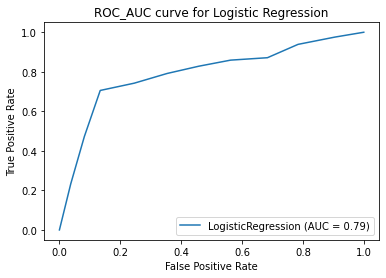

In [119]:
lr=LogisticRegression(C=0.1,penalty='l1',solver='liblinear',random_state=45)
lr.fit(x_train,y_train)
lr_disp=plot_roc_curve(lr,x_test,y_test)
plt.title('ROC_AUC curve for Logistic Regression')
plt.show()

Hyperparameter tuning for Decision Tree Classifier Model

In [120]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [121]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [122]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=45)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

77.28571428571429


ROC_AUC Score for Decision Tree Classifier Model

In [123]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf1=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=45).fit(X,y)
roc_auc_score(y,clf1.predict_proba(X)[:,1])

0.9995771893663126

ROC_AUC curve for Decision Tree Classifier Model

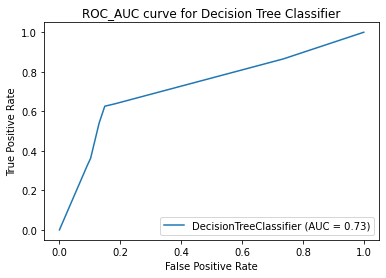

In [124]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=45)
dt.fit(x_train,y_train)
dt_disp=plot_roc_curve(dt,x_test,y_test)
plt.title('ROC_AUC curve for Decision Tree Classifier')
plt.show()

Hyperparameter tuning for Random Forest Classifier Model

In [125]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [126]:
GCV.best_params_

{'max_features': 'log2'}

In [127]:
mod=RandomForestClassifier(max_features='log2',random_state=45)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

77.71428571428571


ROC_AUC Score for Random Forest Classifier Model

In [128]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=RandomForestClassifier(max_features='log2',random_state=45).fit(X,y)
roc_auc_score(y,clf2.predict_proba(X)[:,1])

0.9999999999999999

ROC_AUC curve for Random Forest Classifier Model

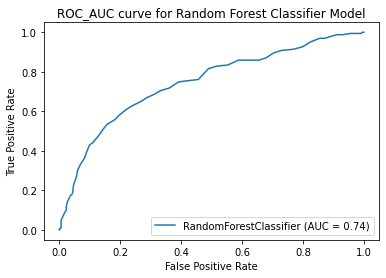

In [129]:
rf=RandomForestClassifier(max_features='log2',random_state=45)
rf.fit(x_train,y_train)
rf_disp=plot_roc_curve(rf,x_test,y_test)
plt.title('ROC_AUC curve for Random Forest Classifier Model')
plt.show()

Hyperparameter tuning for SVC model

In [130]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
GCV=GridSearchCV(SVC(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [131]:
GCV.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [132]:
mod=SVC(C=10,gamma=0.01,kernel='rbf',random_state=45)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

77.14285714285715


ROC_AUC Score for SVC Model

In [133]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=SVC(C=10,gamma=0.01,kernel='rbf',random_state=45).fit(X,y)
roc_auc_score(y,clf2.predict(X))

1.0

ROC_AUC curve for SVC Model

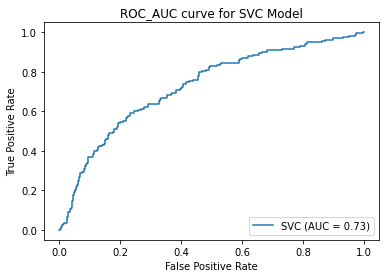

In [134]:
svc=SVC(C=10,gamma=0.01,kernel='rbf',random_state=45)
svc.fit(x_train,y_train)
svc_disp=plot_roc_curve(svc,x_test,y_test)
plt.title('ROC_AUC curve for SVC Model')
plt.show()

Compare with Actual Final Vs Sample Prediction

,Y Test,Prediction
726,0,0
243,0,0
342,1,1
976,0,1
919,1,0


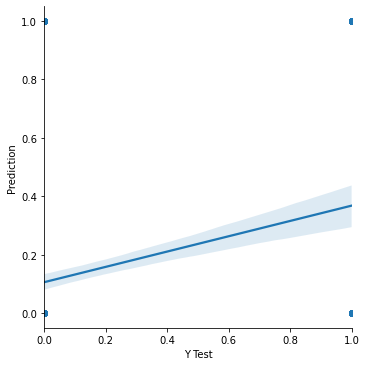

In [135]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model

In [136]:
import joblib
joblib.dump(mod,"Insurance Claims- Fraud Detection.pkl")

['Insurance Claims- Fraud Detection.pkl']

# Loading the saved model

In [137]:
model=joblib.load("Insurance Claims- Fraud Detection.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

77.14285714285715


In [139]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame
prediction.to_csv('Results of Insurance Claims- Fraud Detection.csv')
prediction.head()

,0
0,0
1,0
2,1
3,1
4,0
